R Code 첨부하고 코드 밑에 결과 그림 정리.

In [3]:
from IPython.display import Image

In [ ]:
set.seed(2016147023)
### Excercise 7.3
# data
bluecrab= as.matrix(read.table(url('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/bluecrab.dat')))
orangecrab=as.matrix(read.table(url('http://www2.stat.duke.edu/~pdh10/FCBS/Exercises/orangecrab.dat')))

#a
#blue crab
n=nrow(bluecrab)
ybar=colMeans(bluecrab)
Mu0=c(ybar)
Sigma=cov(bluecrab)
S0=Lambda0=Sigma
nu0=4

#Gibbs Sampler
inv=solve
S=10000
MU=matrix(NA, nrow=S, ncol=2)
SIGMA=matrix(NA, nrow=S, ncol=4)

for (s in 1:S){
  #update MU
  Lambdan=inv(inv(Lambda0)+n*inv(Sigma))
  Mun=Lambdan%*%(inv(Lambda0)%*%Mu0+n*inv(Sigma)%*%ybar)
  Mu=MASS::mvrnorm(n=1, Mun, Lambdan)
  
  #update Sigma
  Sn=S0+(t(bluecrab)-c(Mu))%*%t(t(bluecrab)-c(Mu))
  Sigma=inv(rWishart(1, nu0+n, inv(Sn))[,,1])
  
  MU[s,]=Mu
  SIGMA[s,]=c(Sigma)
}

#orange crab
n=nrow(orangecrab)
ybar=colMeans(orangecrab)
Mu0=c(ybar)
Sigma=cov(orangecrab)
S0=Lambda0=Sigma
nu0=4

#Gibbs Sampler
inv=solve
S=10000
MU1=matrix(NA, nrow=S, ncol=2)
SIGMA1=matrix(NA, nrow=S, ncol=4)

for (s in 1:S){
  #update MU
  Lambdan=inv(inv(Lambda0)+n*inv(Sigma))
  Mun=Lambdan%*%(inv(Lambda0)%*%Mu0+n*inv(Sigma)%*%ybar)
  Mu=MASS::mvrnorm(n=1, Mun, Lambdan)
  
  #update Sigma
  Sn=S0+(t(orangecrab)-c(Mu))%*%t(t(orangecrab)-c(Mu))
  Sigma=inv(rWishart(1, nu0+n, inv(Sn))[,,1])
  
  MU1[s,]=Mu
  SIGMA1[s,]=c(Sigma)
}

#b
library(ggpubr)

disp=tail(1:S, S/2)

title1='Posterior draws of bluecrab size'
p1=data.frame(btheta1=MU[disp,1], btheta2=MU[disp, 2])%>%
  ggplot(aes(x=btheta1, y=btheta2))+geom_point(size=0.5, color='steelblue')+
  geom_abline(slope=1, intercept=0)+
  coord_fixed(ratio=1)+
  labs(title=title1)

title2='Posterior draws of orangecrab size'
p2=data.frame(otheta1=MU1[disp,1], otheta2=MU1[disp, 2])%>%
  ggplot(aes(x=otheta1, y=otheta2))+geom_point(size=0.5, color='steelblue')+
  geom_abline(slope=1, intercept=0)+
  coord_fixed(ratio=1)+
  labs(title=title2)

ggarrange(p1, p2)

title3="Posterior draws of theta1 difference"
theta1_diff=MU[disp,1]-MU1[disp,1]
p3=data.frame(theta1_diff=theta1_diff)%>%
  ggplot(aes(x=theta1_diff))+
  geom_histogram(color='white', fill="steelblue", bins=30)+
  geom_vline(xintercept = 0)+
  labs(title=title3)

title4="Posterior draws of theta2 difference"
theta2_diff=MU[disp,2]-MU1[disp,2]
p4=data.frame(theta2_diff=theta2_diff)%>%
  ggplot(aes(x=theta2_diff))+
  geom_histogram(color='white', fill="steelblue", bins=30)+
  geom_vline(xintercept = 0)+
  labs(title=title4)

ggarrange(p3,p4)


mean(MU[disp,1]>MU1[disp,1])
mean(MU[disp,2]>MU1[disp,2])

#c
bcorr=apply(SIGMA, MARGIN=1, FUN=function(SIGMA){
  SIGMA[2]/sqrt(SIGMA[1]*SIGMA[4])
})

ocorr=apply(SIGMA1, MARGIN=1, FUN=function(SIGMA1){
  SIGMA1[2]/sqrt(SIGMA1[1]*SIGMA1[4])
})

p5=data.frame(crab=c(rep('blue', length(bcorr)/2), rep('orange', length(ocorr)/2)),
              corr=c(bcorr[disp], ocorr[disp]))%>%
  ggplot(aes(x=corr, fill=crab))+
  geom_density(alpha=0.5)+
  scale_fill_manual(values=c('blue', 'orange'))

ggarrange(p5)

mean(bcorr<ocorr)


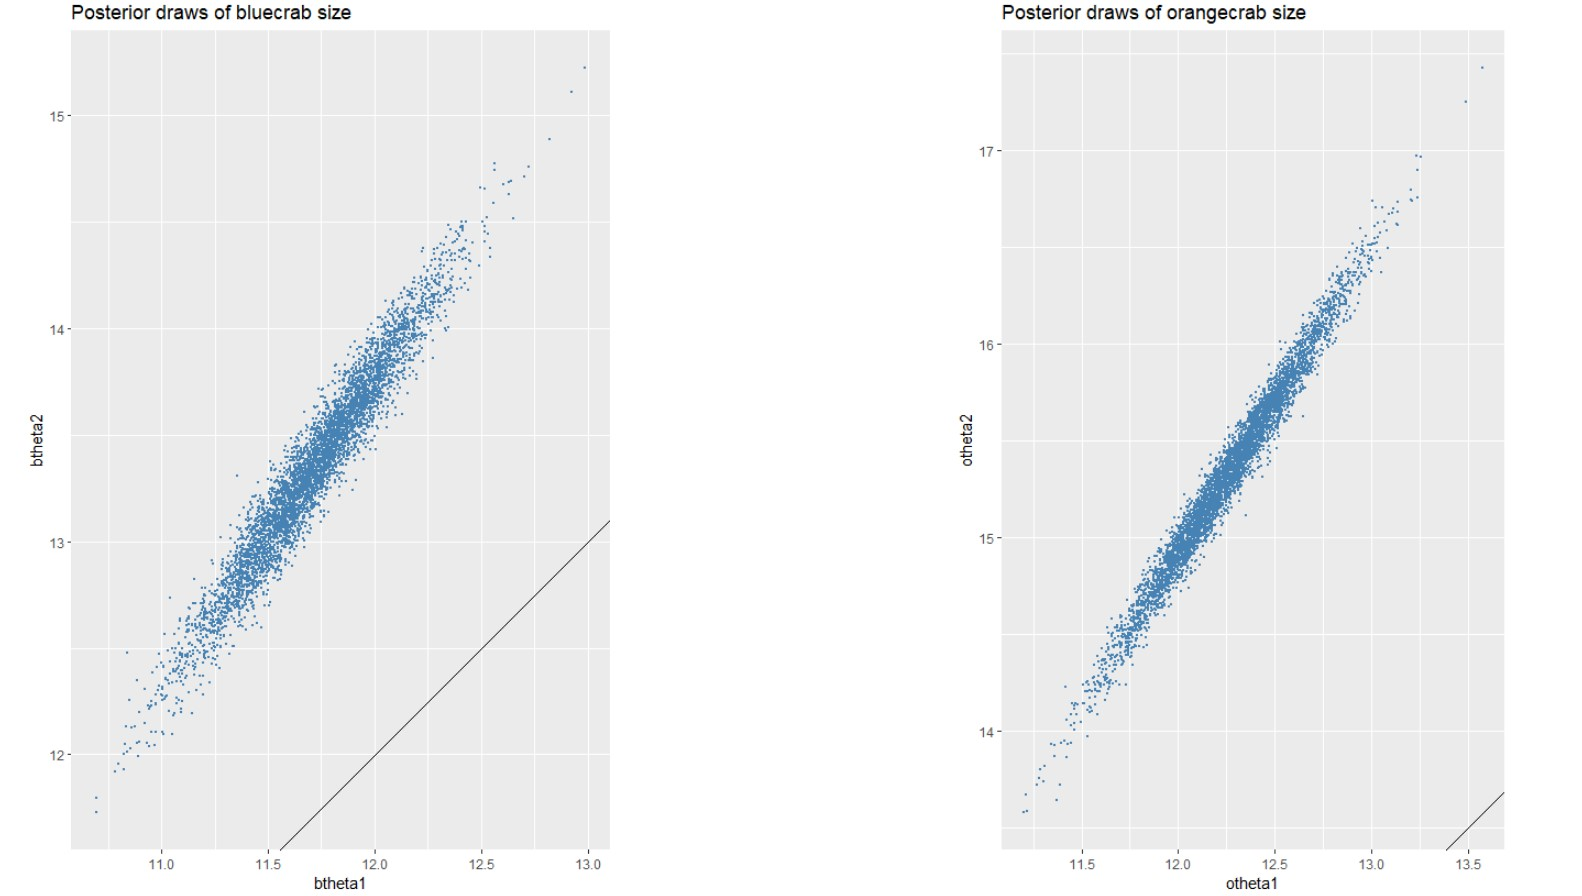

In [4]:
Image('1-1.jpg')

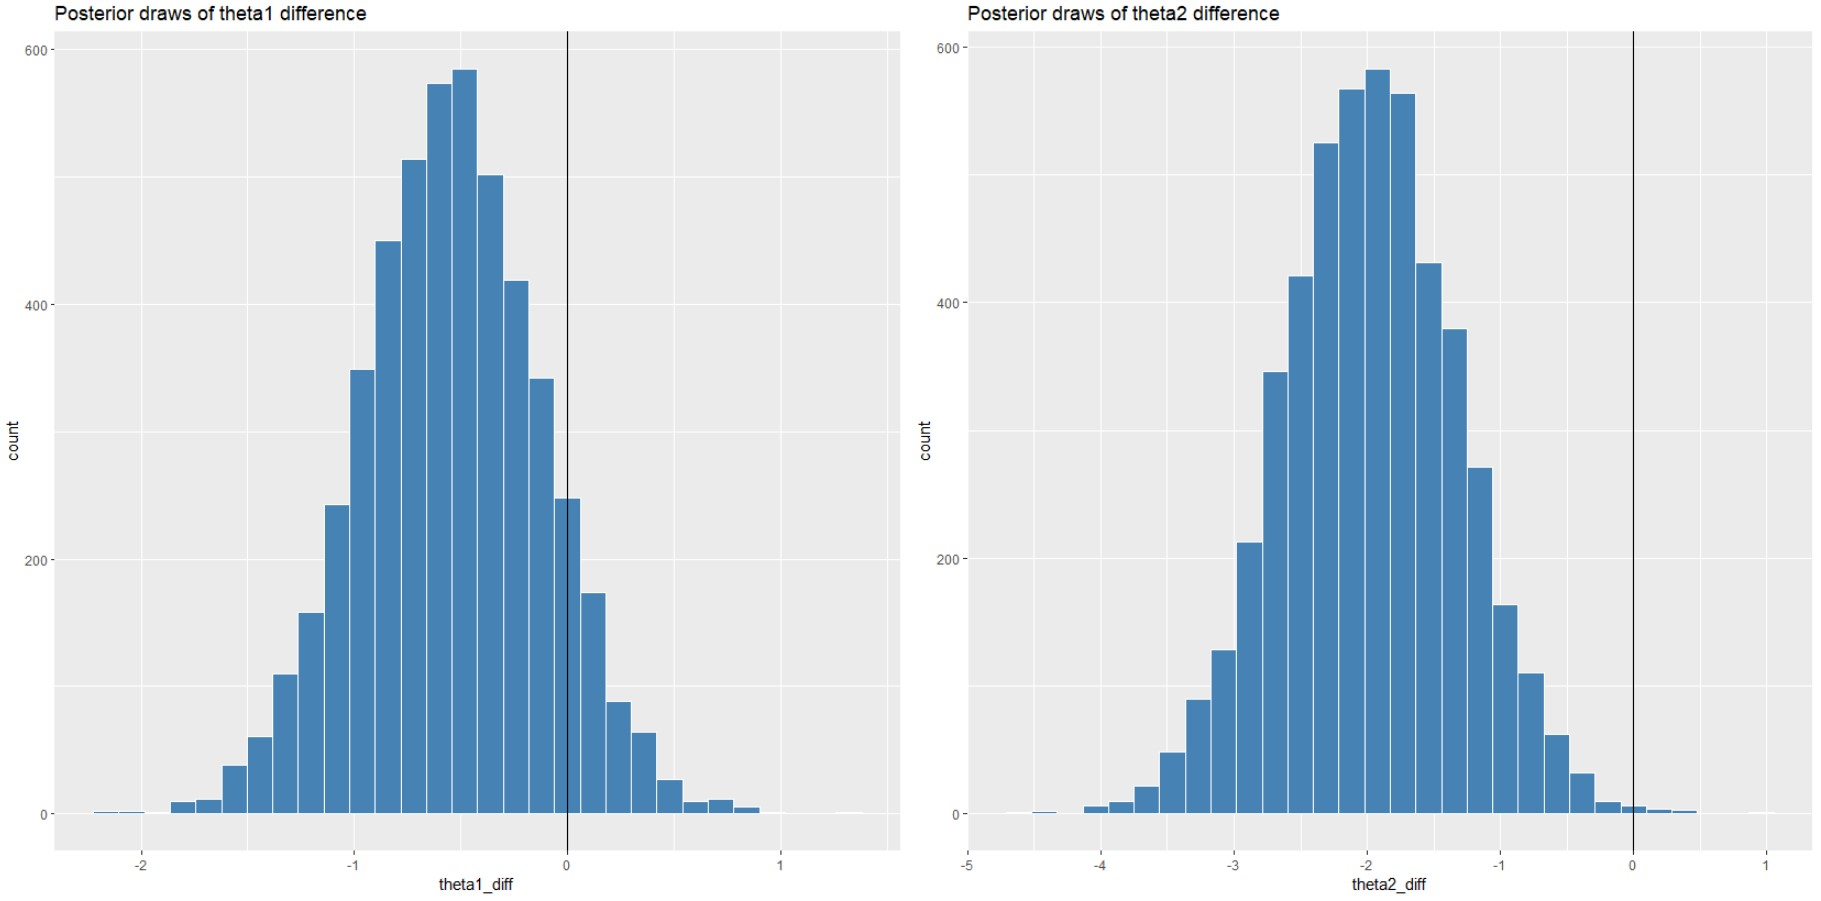

In [5]:
Image('1-2.jpg')

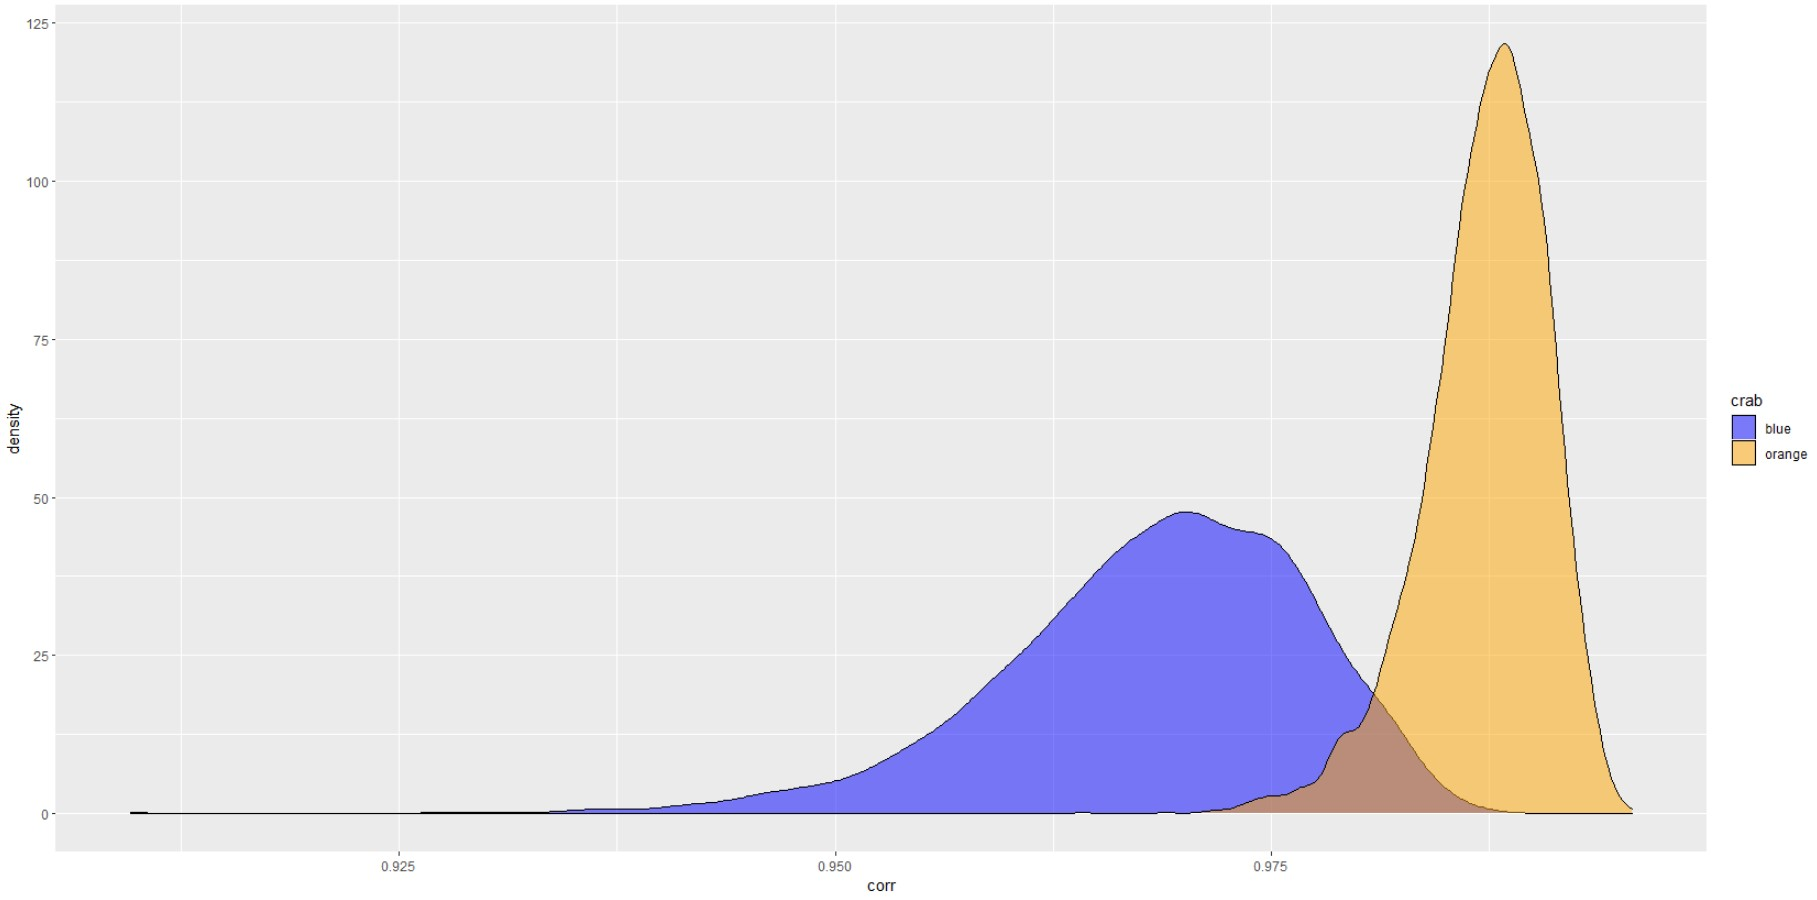

In [6]:
Image('1-3.jpg')

전체적으로 그림이 다른 것을 확인하였지만, 코드상 어느 부분을 틀린 건지 확인하지 못하였습니다.

# Gibbs Sampling

용량 제한 상 채워주세요 부분 코드만 첨부를 하고 결과 gif를 첨부하겠습니다

그러려고 했지만 gif 때문에 용량 제한에 걸려서 삭제...

In [ ]:
def conditional_sampler(sampling_index, current_x, mean, cov):
    conditioned_index = 1 - sampling_index # 두 r.v. 중에 뭘 sampling할지 결정
    a = cov[sampling_index, sampling_index] # Sigma00
    b = cov[sampling_index, conditioned_index]  # Sigma01
    c = cov[conditioned_index, conditioned_index]  # Sigma11
    
    #Homework
    mu = mean[sampling_index]+(b*(current_x[conditioned_index]-mean[conditioned_index]))/c
    sigma = np.sqrt(a-(b**2)/c)
    new_x = np.copy(current_x)
    new_x[sampling_index] = np.random.randn()*sigma + mu
    # [x_0, x_1] 꼴의 1x2 np.array를 return
    return new_x

# NA Imputation

Homework 부분

Homework가 포함된 셀

순서로 코드를 첨부하였고 결과 그림을 첨부하였습니다

### Homework

In [ ]:
S0 = (n-p-1)*L0

In [ ]:
for s in range(S):
    # update mu
    ybar = fill_data.mean().to_numpy()
    Ln = inv(inv(L0)+n*(inv(Sigma)))        # Lambda_n
    mun = np.matmul(Ln,(np.matmul(inv(L0),mu0)+n*np.matmul(inv(Sigma),ybar)))       # mu_n
    ## sample mu from full conditional probability given Sigma & y ##
    Mu = stats.multivariate_normal.rvs(mun, Ln, 1)      

    # update Sigma
    S_mu = (np.asmatrix(fill_data-Mu).T*np.asmatrix(fill_data-Mu)).A
    Sn = S0+S_mu
    ## sample Sigma from full conditional probability given mu & y ##
    Sigma = stats.invwishart.rvs(nu0+n, inv(Sn),1)

### Code

In [ ]:
n = data.shape[0]       # data 수
p = data.shape[1]       # column 수

S = 100                 # number of iteration (몇 번 update 할건지)

# 자주 쓰는 함수
inv = np.linalg.inv     # 역행렬 구하기
t = np.transpose        # transpose

# priors
## prior for mu ~ N(  ,   )
# mean vector mu_0
mu0 = data.mean().to_numpy()    # column mean

# covariance matrix Lambda_0 : 공분산 행렬 만들기
sd0 = mu0 / 2                   # 왜 이렇게 initialize하는지 모르겠지만 암튼 prior란 원래 나름의 믿음에 따라 주는거니까..
# 아마 actual dataset의 dispersion을 고려하거나 해서 그런게 아닐까..?
L0 = np.ones((p,p))*0.1         # Lambda0 in prior    
di = np.diag_indices(p)         # diagonal index indicator
L0[di] = 1                      # 일단 분산을 1로 init
L0 = L0 * np.outer(sd0, sd0)    # off-diagonal terms

## prior for Sigma ~ Ing-Wishart(   ,   )
nu0 = p + 2                     # first param
S0 = (n-p-1)*L0 #Homework

# misc
Sigma = S0                      # mu의 full conditional posterior를 초기화하는데 필요함
fill_data = data.copy()         # imputate할 dataset copy 만들기

O = data.isna().to_numpy()*1    # indicator variable (결측치 있으면 1, 결측치 없으면 0)

# Naive Imputation
for col in fill_data.columns:
    # 일단 mean imputation
    # 아마 계산 시 nan 있어서 생기는 error를 방지하기 위해서 나이브하게 뭐라도 채워놓고 simulation을 돌린것같음.
    fill_data[col].fillna(fill_data[col].mean(), inplace=True)

In [ ]:
#Homework
for s in range(S):
    # update mu
    ybar = fill_data.mean().to_numpy()
    Ln = inv(inv(L0)+n*(inv(Sigma)))        # Lambda_n
    mun = np.matmul(Ln,(np.matmul(inv(L0),mu0)+n*np.matmul(inv(Sigma),ybar)))       # mu_n
    ## sample mu from full conditional probability given Sigma & y ##
    Mu = stats.multivariate_normal.rvs(mun, Ln, 1)      

    # update Sigma
    S_mu = (np.asmatrix(fill_data-Mu).T*np.asmatrix(fill_data-Mu)).A
    Sn = S0+S_mu
    ## sample Sigma from full conditional probability given mu & y ##
    Sigma = stats.invwishart.rvs(nu0+n, inv(Sn),1)

    # update missing data
    for i in range(n):

        # row별로 돌아가면서 1x4 array에 대해서 imputation
        # [T, F, F, T] 등의 형태로 indexing
        a = O[i,]==0        # i번째 row에 결측치 없는 위치
        b = O[i,]==1        # i번째 row에 결측치 있는 위치

        if sum(b)!=0:       # 결측치가 하나라도 있으면 imputation 진행! (결측치 하나도 없으면 sum(b)==0 loop 벗어남)
            # iSa, beta_j에 관한 설명은 좀 어려워서 스킵
            # 궁금하면 FCB p118 (7.10), (7.11) equation 설명 참고
            iSa = inv(Sigma[np.outer(a,a)].reshape(sum(a),sum(a)))
            beta_j = np.matmul(Sigma[np.outer(b,a)].reshape(sum(b),sum(a)), iSa)

            # Covariance Matrix for MVN distribution
            Sigma_j = Sigma[np.outer(b,b)].reshape(sum(b),sum(b)) - np.linalg.multi_dot([Sigma[np.outer(b,a)].reshape(sum(b),sum(a)), iSa, Sigma[np.outer(a,b)].reshape(sum(a),sum(b))])
            # Mean Vector for MVN distribution
            mu_j = Mu[b] + np.matmul(beta_j, t(fill_data.iloc[i, a])-Mu[a])

            # MVN 에서 결측치 있는 위치 (b)만 sampling한 값으로 채우기!
            fill_data.iloc[i,b] = stats.multivariate_normal.rvs(mu_j, Sigma_j, 1)

    if s%10==0:
        print(s,"/",S)

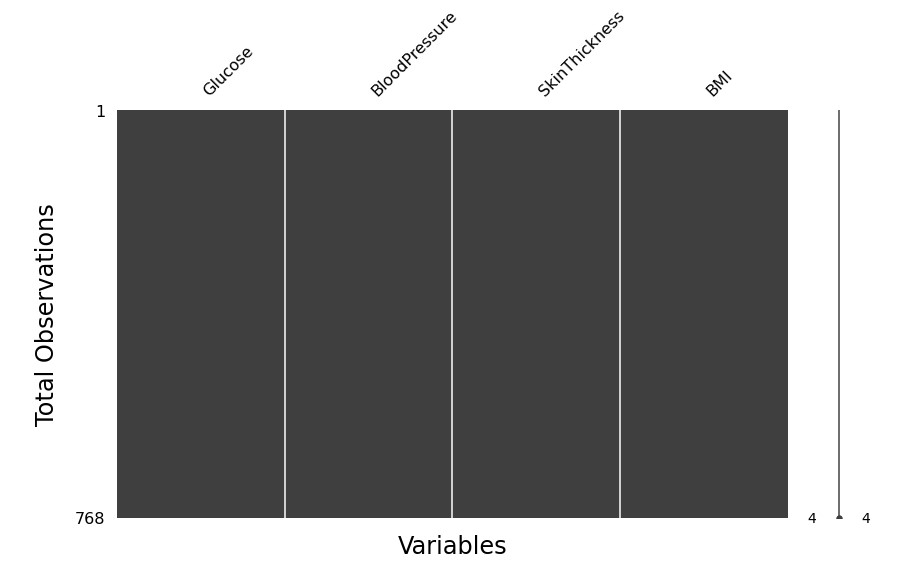

In [8]:
Image('3-1.jpg')

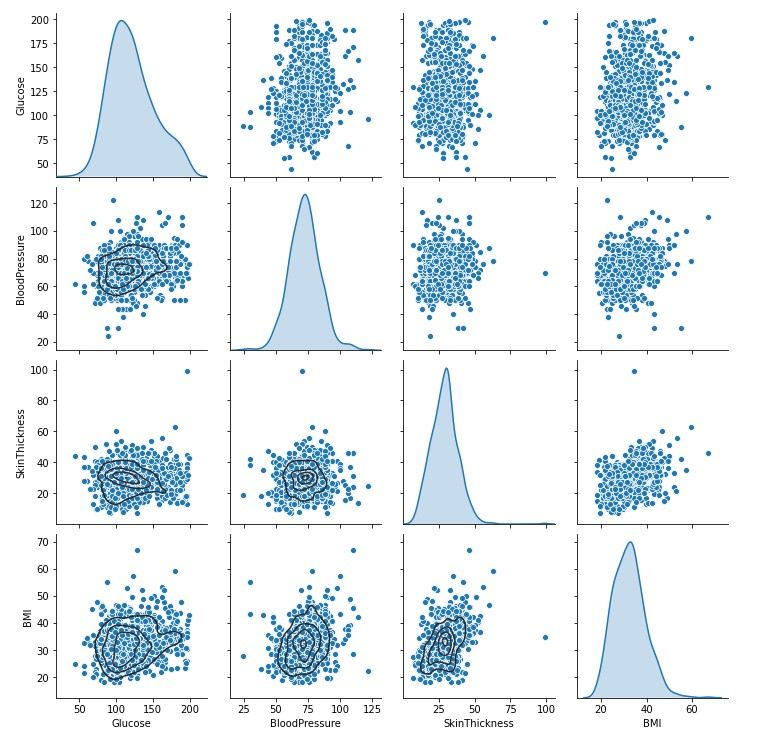

In [9]:
Image('3-2.jpg')